In [1]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds as svd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris_data.txt',sep=',', header=None)

In [3]:
iris = data.values

In [4]:
iris = np.reshape(iris, (4,150))

In [5]:
iris.shape

(4, 150)

In [6]:
A = iris - iris.mean()

In [7]:
u, sigma, v_T = svd(A, k=3)

In [8]:
u

array([[-0.34607757, -0.84562353,  0.13863722],
       [-0.7946472 ,  0.3504673 ,  0.48125408],
       [ 0.28911513, -0.34370134,  0.55488001],
       [ 0.40642168,  0.20967332,  0.6642909 ]])

In [9]:
#np.reshape(u[:,0], (len(u),1))
#np.reshape(u[:,0], (1,4))
np.transpose(u[:,0]).shape

(4,)

In [10]:
def projection(u, a, u_num):
    u_T = np.reshape(u[:,u_num],(1, len(u)))
    proj = np.matmul(u_T, a)
    return proj

In [11]:
A[0].shape

(150,)

In [12]:
projection_u1 = projection(u, A, 0)
projection_u2 = projection(u, A, 1)

In [14]:
projection_u1.shape

(1, 150)

In [15]:
projection_u2.shape

(1, 150)

In [56]:
col = ['k']*50 + ['r']*50 + ['b']*50

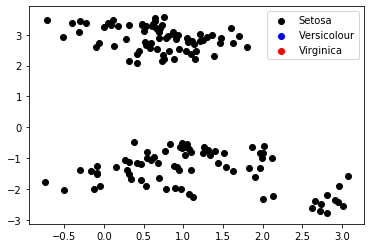

In [55]:
plt.scatter(projection_u1[:50],projection_u2[:50], c= 'black',label='Setosa')
plt.scatter(projection_u1[50:100],projection_u2[50:100], c= 'blue', label='Versicolour')
plt.scatter(projection_u1[100:],projection_u2[100:], c= 'red', label='Virginica')
plt.legend()

In [58]:
import seaborn as sns
import pandas as pd

In [75]:
df = pd.DataFrame(columns=['Type','u1_proj','u2_proj'], index=[x for x in range(0,150)])

In [79]:
df['Type'][:50] = 'Setosa'
for i in range(50):
    df['u1_proj'][i] = projection_u1[0][i]
    df['u2_proj'][i]= projection_u2[0][i]

In [81]:
df['Type'][50:100] = 'Versicolour'
for i in range(50, 100):
    df['u1_proj'][i] = projection_u1[0][i]
    df['u2_proj'][i]= projection_u2[0][i]

In [82]:
df['Type'][100:150] = 'Virginica'
for i in range(100, 150):
    df['u1_proj'][i] = projection_u1[0][i]
    df['u2_proj'][i]= projection_u2[0][i]

In [83]:
df

,Type,u1_proj,u2_proj
0,Setosa,2.7285,-2.72292
1,Setosa,1.97208,-1.33614
2,Setosa,1.14974,2.22032
3,Setosa,0.509641,3.10456
4,Setosa,2.81125,-2.79747
...,...,...,...
145,Virginica,1.09252,-0.805582
146,Virginica,-0.0634621,2.73842
147,Virginica,0.936874,3.0025
148,Virginica,0.467953,-1.7251


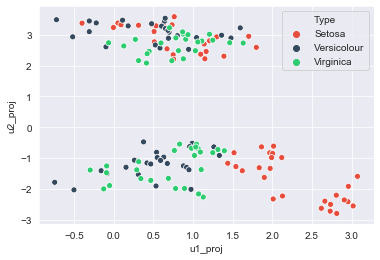

In [95]:
flatui = ["#e74c3c", "#34495e", "#2ecc71"]
#sns.palplot(sns.color_palette(flatui))
sns.set_style('darkgrid')
sns.scatterplot(x='u1_proj', y='u2_proj',
                data=df, hue='Type',
                palette=sns.color_palette(flatui))
plt.savefig('categorize.png')